In [3]:
# handle with overfitting 1
# L1 and L2 regularization

# load datasets
import pandas as pd
import numpy as np
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['label', 'alcohol', 'malic acid', 'ash', 'alcalinity of ash', 
                   'magnesium', 'total phenols', 'flavanoids', 'nonflavanoid phenols', 
                   'proanthocyanins', 'color intensity', 'hue', 
                   'OD280/OD315 of diluted wines', 'proline']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)
print(pd.DataFrame(X_train_std).head())

         0         1         2         3         4         5         6   \
0  0.712259  2.220487 -0.130259  0.059629 -0.504327 -0.528316 -1.240000   
1  0.882292 -0.704572  1.175336 -0.090655  2.341479  1.016759  0.662995   
2  0.845856 -0.730230  1.175336  0.811048  0.135979  1.098079  1.163267   
3  0.578661 -0.473646  0.988823 -0.240939  0.776285  0.040922  0.457000   
4 -0.526554  0.090839 -0.689799 -0.391223 -0.362037 -1.146346 -1.377330   

         7         8         9         10        11        12  
0  0.841180 -1.052151 -0.292189 -0.200170 -0.821641 -0.629464  
1  1.088743 -0.492935  0.131521  1.339826  0.549313  1.475688  
2 -0.644195  1.252496  0.258634  1.068062  0.130811  1.629349  
3 -0.644195 -0.170963 -0.376931  0.660416  0.361708  1.045438  
4  2.161513 -1.187719  0.851827 -1.015462 -1.499903 -0.183848  


intercept(w0): 
           0
0 -1.263522
1 -1.215938
2 -2.370012 

weights coefficient vector(w1->wm): 
          0         1         2         3         4    5         6    7    8   \
0  1.246098  0.180555  0.746195 -1.163766  0.000000  0.0  1.159635  0.0  0.0   
1 -1.537346 -0.387096 -0.995045  0.364563 -0.059569  0.0  0.668039  0.0  0.0   
2  0.135559  0.168481  0.357193  0.000000  0.000000  0.0 -2.437668  0.0  0.0   

         9         10        11        12  
0  0.000000  0.000000  0.556822  2.508622  
1 -1.934287  1.234315  0.000000 -2.231745  
2  1.563859 -0.818976 -0.492428  0.000000   



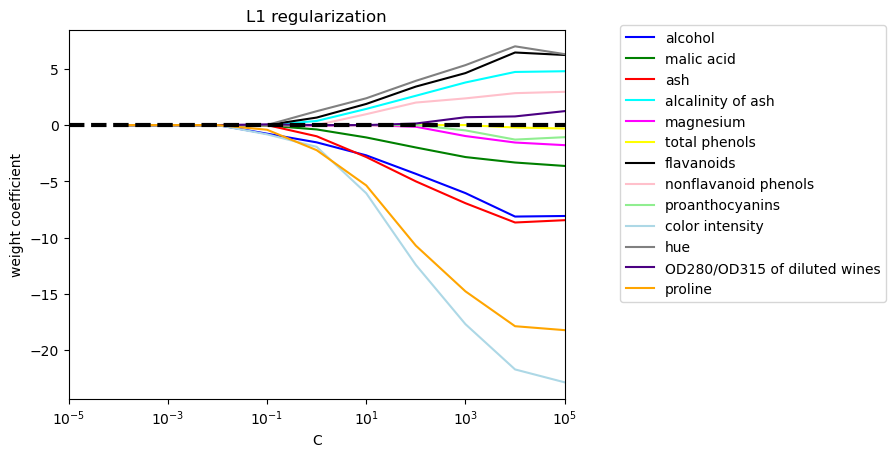

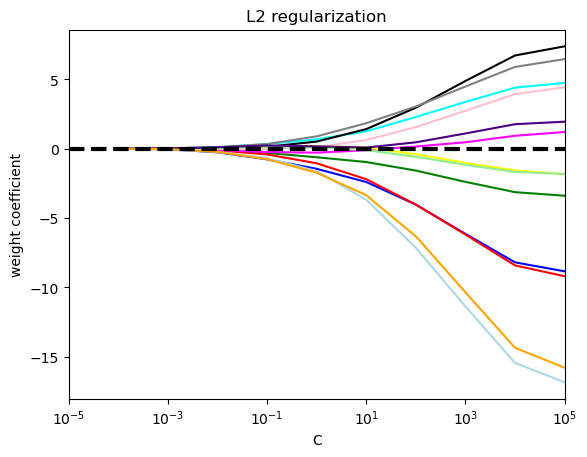

In [4]:
# L1 regularization
# -----------------
# ||w||1 = sum(|wj|)

# L2 regularization
# -----------------
# ||w||2 = sum(wj^2)

from sklearn.linear_model import LogisticRegression
LR_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, multi_class='ovr')
LR_l1.fit(X_train_std, y_train)
print('intercept(w0): \n', pd.DataFrame(LR_l1.intercept_), '\n')
print('weights coefficient vector(w1->wm): \n', pd.DataFrame(LR_l1.coef_), '\n')

# visualize L1, L2 regularization
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights_l1, params_l1, weights_l2, params_l2 = [], [], [], []
for c in np.arange(-4., 6.):
    LR_l1 = LogisticRegression(penalty='l1', C=10.**c, 
                               solver='liblinear', multi_class='ovr', 
                               random_state=0)
    LR_L2 = LogisticRegression(penalty='l2', C=10.**c, 
                               solver='liblinear', multi_class='ovr', 
                               random_state=0)
    LR_l1.fit(X_train_std, y_train)
    LR_L2.fit(X_train_std, y_train)
    weights_l1.append(LR_l1.coef_[1])
    weights_l2.append(LR_L2.coef_[1])
    params_l1.append(10**c)
    params_l2.append(10**c)

weights_l1 = np.array(weights_l1)
weights_l2 = np.array(weights_l2)

for column, color in zip(range(weights_l1.shape[1]), colors):
    plt.plot(params_l1, weights_l1[:, column], 
             label=df_wine.columns[column+1], 
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.xlabel('C')
plt.ylabel('weight coefficient')
plt.xscale('log')
plt.legend(loc='upper left')
plt.title('L1 regularization')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), 
          ncol=1, fancybox=True)
plt.show()



for column, color in zip(range(weights_l2.shape[1]), colors):
    plt.plot(params_l2, weights_l2[:, column], 
             label=df_wine.columns[column+1], 
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.xlabel('C')
plt.ylabel('weight coefficient')
plt.xscale('log')
plt.title('L2 regularization')
plt.show()

In [5]:
# handle with overfitting 2
# Dimensionality reduction: feature selection, feature extration

# sequential backward selection (SBS)
# this technique is useful for model that cannot be apply regularization
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS():
    """Select the best feature subsets of all
    
    Parameters
    ----------
    estimator: object
        Target estimator/predictor for prediction.
    k_features: int
        Number of target features last.
    scoring: object
        Scoring method.
    test_size: float
        test dataset ratio.
    random_state: int
        randomization seed.
    
    Return
    ------
    X: shape[:, indices_best]
        Return the selected dataset, where features has been reduced to 'k_features' columns
    """

    def __init__(self, estimator, k_features, 
                 scoring=accuracy_score, 
                 test_size=0.3, 
                 random_state=1) -> None:
        self.scoring = scoring
        self.estimator = estimator
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        """How it works
        
        First
        -----
        - Initialize index of target best features combination, which is all at the beginning
        - Initialize subsets at current dimension, which is full dimension

        Second
        ------
        - Iterate current subset and sperate it into 'd-1' dimension's subsets
        - figure out the best score and select that best score subsets
        - Make the new dimension subsets be the new index
        - Append new dimension subsets to global subsets
        - Update scores and d

        Finally
        -------
        - Get target indices(subsets) which has the best score of all in that dimension 
        """
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, 
                                                            random_state=self.random_state)
        d = X_train.shape[1]

        # initialize:  
        # feature indices (which is all at beginning)
        # subsets (list of current dimentional indices)
        # score (first score of all features)
        self.sbs_indices_ = tuple(range(d))
        self.sbs_subsets_ = [self.sbs_indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.sbs_indices_)
        self.sbs_scores_ = [score]

        while d > self.k_features:
            scores = []
            subsets = []

            # p is the subsets of feature indices, in dimension of  
            # d-1, d-2, d-3, d-4, ..., d-k_feature
            for p in combinations(self.sbs_indices_, r=d - 1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)

            # update:
            # global indices (current best socre subset's indices, dimension has reduced)
            # global subsets (append a new dimension indices list)
            # global scores (best scores list of every dimension)
            # d
            self.sbs_indices_ = subsets[best]
            self.sbs_subsets_.append(self.sbs_indices_)
            self.sbs_scores_.append(scores[best])
            d -= 1

        self.k_score_ = self.sbs_scores_[-1]
        return self

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, pred)
        return score
    
    def transform(self, X):
        return X[:, self.sbs_indices_]

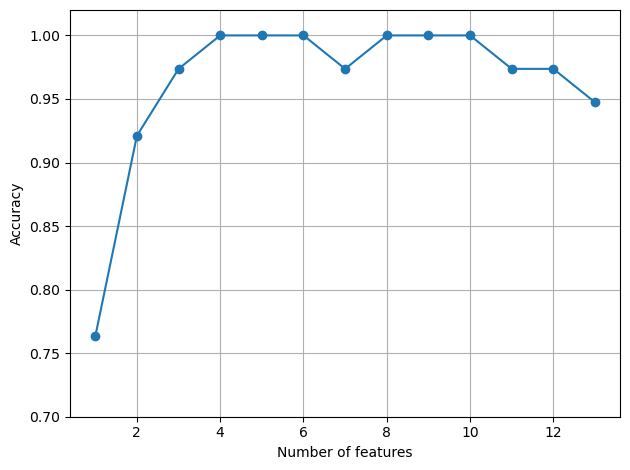

In [6]:
# visualize the selection result
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)
k_feat = [len(k) for k in sbs.sbs_subsets_]

plt.plot(k_feat, sbs.sbs_scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.grid()
plt.tight_layout()
plt.show()

In [7]:
# see 4 features result
k4 = list(sbs.sbs_subsets_[9])
print(df_wine.columns[1:][k4])

# compare 4 features accuracy with 
# full features accuracy on KNN model
knn.fit(X_train_std, y_train)
print('full Training accuracy: ', knn.score(X_train_std, y_train))
print('full Test accuracy: ', knn.score(X_test_std, y_test))

knn.fit(X_train_std[:, k4], y_train)
print('k4 Training accuracy: ', knn.score(X_train_std[:, k4], y_train))
print('k4 Test accuracy: ', knn.score(X_test_std[:, k4], y_test))

Index(['alcohol', 'malic acid', 'flavanoids', 'hue'], dtype='object')
full Training accuracy:  0.967741935483871
full Test accuracy:  0.9629629629629629
k4 Training accuracy:  0.9516129032258065
k4 Test accuracy:  1.0


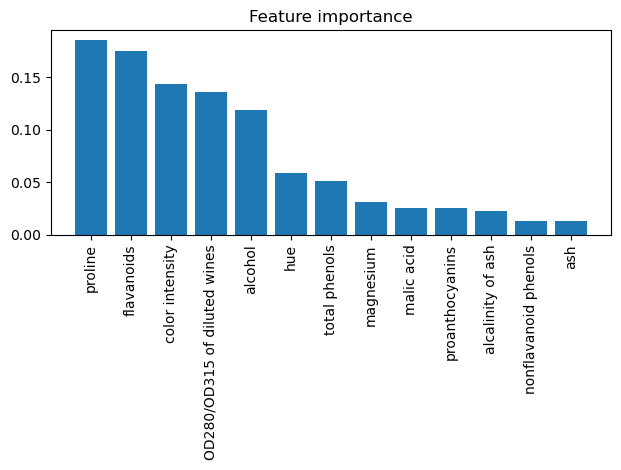

In [9]:
# feature importance using Random Forest model
from sklearn.ensemble import RandomForestClassifier

labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)

forest.fit(X_train, y_train)
importance = forest.feature_importances_
indices = np.argsort(importance)[::-1]

plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), 
        importance[indices], 
        align='center')
plt.xticks(range(X_train.shape[1]), 
           labels[indices], 
           rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()